In [1]:
!pip install pillow

# Feature Map Visualization

- we can see intuitively how feature map formed and focused
- There is a module called **explainable_cnn**, so you can import this and just use it
- **Refer to github/ashutosh1919/explainable-cnn**

In [3]:
! pip install explainable-cnn

In [4]:
from explainable_cnn import CNNExplainer
import pickle
from torchvision import models
import matplotlib.pyplot as plt

In [6]:
from google.colab import files
files.upload()

Saving imagenet_class_labels.pkl to imagenet_class_labels.pkl


{'imagenet_class_labels.pkl': b'\x80\x04\x954g\x00\x00\x00\x00\x00\x00}\x94(K\x00\x8c\x12tench, Tinca tinca\x94K\x01\x8c\x1bgoldfish, Carassius auratus\x94K\x02\x8cSgreat white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias\x94K\x03\x8c\x1ftiger shark, Galeocerdo cuvieri\x94K\x04\x8c\x1chammerhead, hammerhead shark\x94K\x05\x8c*electric ray, crampfish, numbfish, torpedo\x94K\x06\x8c\x08stingray\x94K\x07\x8c\x04cock\x94K\x08\x8c\x03hen\x94K\t\x8c\x19ostrich, Struthio camelus\x94K\n\x8c#brambling, Fringilla montifringilla\x94K\x0b\x8c\x1egoldfinch, Carduelis carduelis\x94K\x0c\x8c)house finch, linnet, Carpodacus mexicanus\x94K\r\x8c\x0fjunco, snowbird\x94K\x0e\x8c;indigo bunting, indigo finch, indigo bird, Passerina cyanea\x94K\x0f\x8c)robin, American robin, Turdus migratorius\x94K\x10\x8c\x06bulbul\x94K\x11\x8c\x03jay\x94K\x12\x8c\x06magpie\x94K\x13\x8c\tchickadee\x94K\x14\x8c\x13water ouzel, dipper\x94K\x15\x8c\x04kite\x94K\x16\x8c4bald eagle, American eagle, H

In [7]:
with open("/content/imagenet_class_labels.pkl", "rb") as label_file:
    imagenet_class_labels = pickle.load(label_file)

In [8]:
model = models.resnet18(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 37.4MB/s]


In [9]:
x_cnn = CNNExplainer(model, imagenet_class_labels)

In [10]:
from google.colab import files
files.upload()

Saving tiger_shark.jpeg to tiger_shark.jpeg


{'tiger_shark.jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x02\x02\x03\x02\x02\x02\x02\x02\x04\x03\x03\x02\x03\x05\x04\x05\x05\x05\x04\x04\x04\x05\x06\x07\x06\x05\x05\x07\x06\x04\x04\x06\t\x06\x07\x08\x08\x08\x08\x08\x05\x06\t\n\t\x08\n\x07\x08\x08\x08\xff\xdb\x00C\x01\x01\x01\x01\x02\x02\x02\x04\x02\x02\x04\x08\x05\x04\x05\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\xff\xc0\x00\x11\x08\x019\x01\xf4\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x00\x02\x03\x00\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x01\x04\x05\x00\x06\x07\x08\t\xff\xc4\x00O\x10\x00\x02\x01\x02\x04\x03\x05\x06\x03\x06\x04\x04\x03\x07\x01\t\x01\x02\x03\x04\x11\x00\x12!1\x05AQ\x06\x13"aq\x072\x81\x91\xa1\xf0\x14\xb1\xc1#BRr\xd1\xe1\x08\x153\xf1

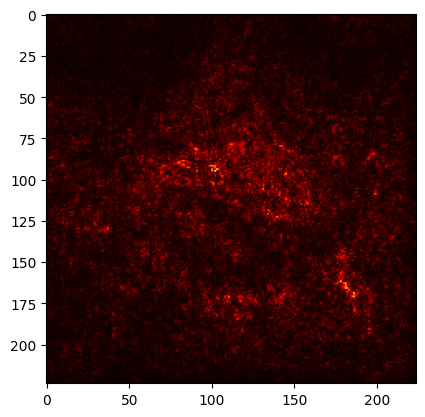

In [17]:
saliency_map = x_cnn.get_saliency_map(
    "/content/tiger_shark.jpeg",
    3, # Label corresponding to Shark. You can pass either 3 or "tiger shark, Galeocerdo cuvieri",
    (224, 224)
)

plt.imshow(saliency_map, cmap="hot")

# Too much Noise

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1830: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


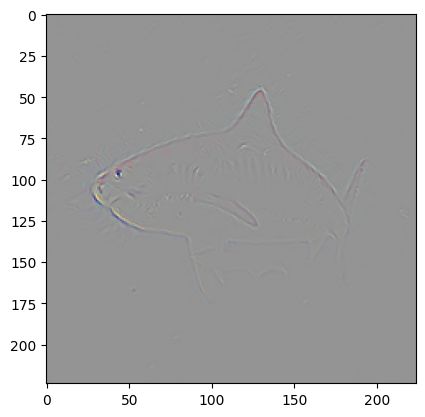

In [18]:
# Using Guided Backpropagation
# Kind of using ReLU in Backpropagation

guided_backprop = x_cnn.get_guided_back_propagation(
    "/content/tiger_shark.jpeg",
    3,
    (224, 224)
)

plt.imshow(guided_backprop.astype('uint8'))